In [156]:
import pandas as pd
import seaborn as sns
import scipy.stats as S
import statsmodels
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing as skp

In [157]:
# ! pip install statsmodels

# Import and Preprocessing
user please put the data in where we can import it directly or change the data_path var

In [158]:
data_path = 'MP2_Data.csv'
df = pd.read_csv(data_path)

In [693]:
dfo = pd.read_csv(data_path)

# EDA

In [694]:
dfo

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ML-2020-60,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,28,0,22,0,1,0,0,0,0
103,ML-2020-58,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,3,0,0,0,0
104,ML-2020-94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
105,ML-2020-9,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,6,0,0,0,0


In [159]:
# check nulls or empty
# result no null or empty
df.dropna().shape[0] == df.dropna().shape[0]

True

In [160]:
# print all uniques from each columns to see their values
for c in df.columns:
    print("unique in {}".format(c), df[c].unique())

unique in ID ['ML-2020-1' 'ML-2020-2' 'ML-2020-3' 'ML-2020-4' 'ML-2020-6' 'ML-2020-7'
 'ML-2020-8' 'ML-2020-11' 'ML-2020-13' 'ML-2020-14' 'ML-2020-16'
 'ML-2020-17' 'ML-2020-18' 'ML-2020-21' 'ML-2020-22' 'ML-2020-23'
 'ML-2020-25' 'ML-2020-26' 'ML-2020-28' 'ML-2020-29' 'ML-2020-30'
 'ML-2020-32' 'ML-2020-33' 'ML-2020-34' 'ML-2020-35' 'ML-2020-36'
 'ML-2020-37' 'ML-2020-38' 'ML-2020-40' 'ML-2020-41' 'ML-2020-42'
 'ML-2020-43' 'ML-2020-44' 'ML-2020-45' 'ML-2020-46' 'ML-2020-47'
 'ML-2020-48' 'ML-2020-51' 'ML-2020-52' 'ML-2020-53' 'ML-2020-54'
 'ML-2020-55' 'ML-2020-56' 'ML-2020-59' 'ML-2020-62' 'ML-2020-64'
 'ML-2020-65' 'ML-2020-67' 'ML-2020-68' 'ML-2020-69' 'ML-2020-70'
 'ML-2020-71' 'ML-2020-72' 'ML-2020-73' 'ML-2020-75' 'ML-2020-76'
 'ML-2020-77' 'ML-2020-78' 'ML-2020-79' 'ML-2020-81' 'ML-2020-82'
 'ML-2020-83' 'ML-2020-84' 'ML-2020-85' 'ML-2020-87' 'ML-2020-88'
 'ML-2020-90' 'ML-2020-91' 'ML-2020-92' 'ML-2020-93' 'ML-2020-95'
 'ML-2020-97' 'ML-2020-98' 'ML-2020-100' 'ML-2020-102' 'M

Text(0.5, 1.0, '0 count in peer review progression')

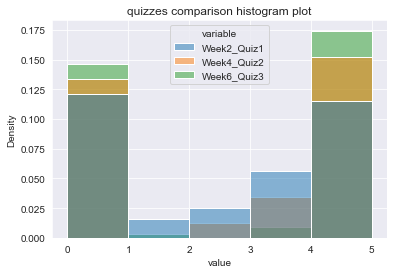

<Figure size 432x288 with 0 Axes>

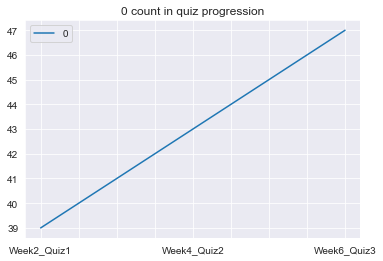

<Figure size 432x288 with 0 Axes>

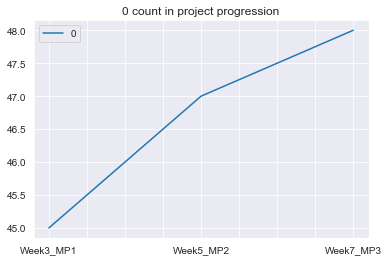

<Figure size 432x288 with 0 Axes>

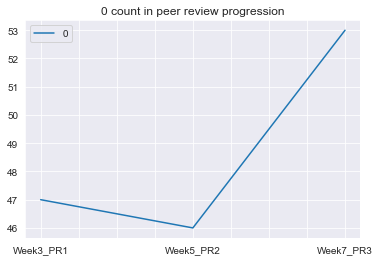

In [207]:
"""
single variable distribution on all columns
How?
for floating value - box plot,
for integers, histogram

we can group columns into categories
first we do it by quiz grade and plot them together since they are comparable
then we plot the project grades
final grade we and week 8 total we can put them together because total is the representative of the actual grade
"""
q_cols = ['Week2_Quiz1', 'Week4_Quiz2', 'Week6_Quiz3']
mp_cols = ['Week3_MP1','Week5_MP2', 'Week7_MP3']
pr_cols = ['Week3_PR1', 'Week5_PR2', 'Week7_PR3']
wstats_cols = df.columns[11:-1].tolist()
# plot quiz score boxplot
"""
from histogram,
it seems like you either get 4 and above for quiz or just get 0
the inbetween becomes more severe as quiz goes on.
example:
first quiz the number of people who got between 4 and 5 is about 11%
while the number of people who get between 0 and 1 is about the same or slightly higher at 12%
by the end (6th week), the number of people who get between 4 and 5 rose to almost 17.5%
while the people who got between 0 and 1 is at almost 15%
this can be indication of people taking the class more seriously or some more people dropped from the course.
"""
ax = sns.histplot(df[q_cols].melt(), x='value', hue='variable', bins=5, stat='density')
ax.set_title('quizzes comparison histogram plot')
"""
we shall then ask ourselves, do people drop from the course more as time goes by?
logical reasoning says yes.
how do we measure this?
going with the same columns
we can simply measure the  number of 0 from each quiz
we then can do the same for mini project and peer review.
we can then check the weekly stats and we SHOULD see the frequencies of 0 rising up
so let's code
"""
"""
thinking the first 2 plots confirm that
there is an increase of 0 as times goes on.
the weird part is the sudden decrease in peer review but that is only for 1.
"""
plt.figure()
stat = {}
for c in q_cols:
    stat[c] = df[df[c] == 0].shape[0]
ax = pd.DataFrame(stat, index=[0]).transpose().plot(kind='line')
ax.set_title('0 count in quiz progression')
plt.figure()
stat = {}
for c in mp_cols:
    stat[c] = df[df[c] == 0].shape[0]
ax = pd.DataFrame(stat, index=[0]).transpose().plot(kind='line')
ax.set_title('0 count in project progression')
plt.figure()
stat = {}
for c in pr_cols:
    stat[c] = df[df[c] == 0].shape[0]
ax = pd.DataFrame(stat, index=[0]).transpose().plot(kind='line')
ax.set_title('0 count in peer review progression')

All same data: True


Text(0.5, 1.0, 'Box plot of grade vs week 8 total')

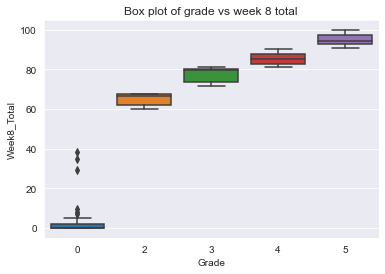

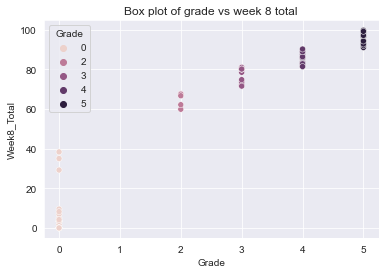

In [162]:
"""
since week8_total seem to be the score accumulated over the course tasks,
let us take a look of the score vs grade and if week 8 score is the true score for grade
from further scrutiny, the grade cut off seems to be at
x1 and not x0 example: 3 to 4 require 81 rather than 80
so week8 total is a good indicator for predicting grade
However, I believe that week8_total is actually a label too rather than a predictor variable
so we create a surrogate variable for week8_total by adding up all quiz and peer review score

then we check if the value from the sum and the week8 total column has the same values
np.isclose is used to bypass floating point error
we check if there is only true value in resulting comparison and it turns out to be true
"""
new_score = df[q_cols + mp_cols + pr_cols].sum(axis=1)
print('All same data:', pd.Series(np.isclose(new_score, df['Week8_Total'])).unique().shape[0] == 1)
ax = sns.boxplot(df, x='Grade', y='Week8_Total')
ax.set_title('Box plot of grade vs week 8 total')
plt.figure()
ax = sns.scatterplot(df, x='Grade', y='Week8_Total', hue='Grade')
ax.set_title('Box plot of grade vs week 8 total')

In [695]:
new_score = df[q_cols + mp_cols + pr_cols].sum(axis=1)
print('All same data:', pd.Series(np.isclose(new_score, df['Week8_Total'])).unique().shape[0] == 1)

All same data: True


# Feature Engineering

just like can we sum up weekly scores and make it good?


In [452]:
df.columns

Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

In [538]:
"""
feature to do:
Quiz_Total, MP Total, PR Total
WeekN_Total
Week5_CumuTotal
WeekN_Stat_Total
Week5_Stat_CumuTotal
we shall then use these WeekN to Week5 to predict if it's possible to predict grade at week5
why week 5 - because we submit the second mini project and quiz 2 - therefore there should be an
urgency of how well someone is doing and whether they can pass or drop the course and how well or
how much effort they should be putting in their final project

Week 5 and 3 because basically - set of grades are out.

We shall also be doing this at week 3 since that is where the first set of grades are out and we can potentially see
who are in trouble if we do not help them

we shall then ask if the separate week score and stat is needed.
we shall then ask if stat is even needed at all or grade is indicative enough: both cumu and total grade or either.
"""
df['Quiz_Total'] = df[q_cols].sum(axis=1)
df['MP_Total'] = df[mp_cols].sum(axis=1)
df['PR_Total'] = df[pr_cols].sum(axis=1)
grade_cols1 = ['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1']
grade_cols2 = ['Week4_Quiz2', 'Week5_MP2', 'Week5_PR2']
grade_cols3 = ['Week6_Quiz3', 'Week7_MP3', 'Week7_PR3']
df['Week3_GradeTotal'] = df[grade_cols1].sum(axis=1)
df['Week5_GradeTotal'] = df[grade_cols2].sum(axis=1)
df['Week5_GradeTotalCumu'] = df[grade_cols1 + grade_cols2].sum(axis=1)
df['Week7_GradeTotal'] = df[grade_cols3].sum(axis=1)
week1_stat_cols = ['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3']
week2_stat_cols = ['Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3']
week3_stat_cols = ['Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3']
week4_stat_cols = ['Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3']
week5_stat_cols = ['Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3']
week6_stat_cols = ['Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3']
week7_stat_cols = ['Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3']
week8_stat_cols = ['Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3']
week9_stat_cols = ['Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3']
df['Week1_StatTotal'] = df[week1_stat_cols].sum(axis=1)
df['Week2_StatTotal'] = df[week2_stat_cols].sum(axis=1)
df['Week3_StatTotal'] = df[week3_stat_cols].sum(axis=1)
df['Week4_StatTotal'] = df[week4_stat_cols].sum(axis=1)
df['Week5_StatTotal'] = df[week5_stat_cols].sum(axis=1)
df['Week6_StatTotal'] = df[week6_stat_cols].sum(axis=1)
df['Week7_StatTotal'] = df[week7_stat_cols].sum(axis=1)
df['Week8_StatTotal'] = df[week8_stat_cols].sum(axis=1)
df['Week9_StatTotal'] = df[week9_stat_cols].sum(axis=1)
df['Week3_StatCumu'] = df[week1_stat_cols + week2_stat_cols + week3_stat_cols].sum(axis=1)
df['Week5_StatCumu'] = df[week1_stat_cols + week2_stat_cols + week3_stat_cols + week4_stat_cols + week5_stat_cols].sum(axis=1)

In [539]:
df

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week4_StatTotal,Week5_StatTotal,Week6_StatTotal,Week7_StatTotal,Week8_StatTotal,Week9_StatTotal,Week3_StatCumu,Week5_StatCumu,Week5_GradeTotalCumu,Week7_GradeTotal
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,55,31,60,3,13,15,72,158,51.09,31.88
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,151,77,85,48,7,35,201,429,50.16,32.27
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,73,36,36,16,10,10,70,179,44.89,34.55
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,270,55,122,42,10,13,147,472,39.63,41.02
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,22,52,43,56,15,9,38,112,41.77,25.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ML-2020-60,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,35,13,20,20,50,1,40,88,0.00,0.00
103,ML-2020-58,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,16,0,0,0,0,3,58,74,0.00,0.00
104,ML-2020-94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,0,20,20,0.00,0.00
105,ML-2020-9,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,12,0,0,0,6,19,31,0.00,0.00


In [489]:
"""
Data columns that have no effect on outcome
Ideally we would like to get rid of features that have no variance at all such as Week1_StatTotal1
"""
described_df = df.describe().transpose()
# here we can see that the variance of Week_Stat1 is 0 we can actually safely leave this column out
# because it will have no affect in predicting grades
# leaving it in will only increase dimension and search space
described_df[described_df['std'].apply(lambda x: np.isclose(0, x))]


,count,mean,std,min,25%,50%,75%,max
Week1_Stat1,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [490]:
"""
DataFrame 2
sometimes we have people who simply wish to take a look at the course and not take the course
this can be seen in PCA training plot where there's always a group of people at grade 0 that is
highly correlated in grades
Logically: these people do not submit quiz, mini project and peer review
therefore they are people with no grades in those.
They MAY participate and click the course to check the course out.
But they have no desire to take the course
Therefore, there is no need for the urgency to help them as much as those who are taking the course
these people CAN BE discarded
"""
df2 = df[~np.isclose(df[grade_cols1].sum(axis=1), 0)]
df2

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week4_StatTotal,Week5_StatTotal,Week6_StatTotal,Week7_StatTotal,Week8_StatTotal,Week9_StatTotal,Week3_StatCumu,Week5_StatCumu,Week5_GradeTotalCumu,Week7_GradeTotal
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,55,31,60,3,9,15,72,158,51.09,31.88
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,147,72,81,40,7,30,190,409,50.16,32.27
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,71,34,36,16,10,10,65,170,44.89,34.55
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,269,54,122,38,10,13,138,461,39.63,41.02
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,22,44,41,50,14,9,38,104,41.77,25.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,ML-2020-98,4.17,15.0,5.0,18.26,5.00,24.66,5.0,4.25,5.0,...,70,18,57,11,19,14,69,157,51.68,34.66
73,ML-2020-100,2.50,14.0,5.0,18.26,5.00,28.64,0.0,3.00,5.0,...,197,73,164,29,27,7,118,388,47.76,33.64
74,ML-2020-102,5.00,15.0,5.0,19.57,5.00,34.60,5.0,5.00,5.0,...,233,55,123,20,15,9,175,463,54.57,44.60
75,ML-2020-103,4.17,11.0,5.0,18.26,4.90,31.02,5.0,5.00,4.5,...,41,104,106,15,14,5,70,215,48.33,40.52


<AxesSubplot:>

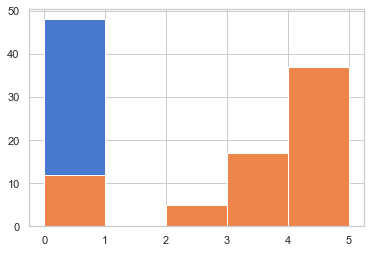

In [491]:
# what become the label distribution from before?
# the decrease of 0 is drastic we reduced rows from 107 to 71
df['Grade'].hist(bins=[0,1,2,3,4,5])
df2['Grade'].hist(bins=[0,1,2,3,4,5])

In [696]:
df2.shape

(71, 66)

In [ ]:
# different data set 2 - removal
# from the data we notice that there are some people who just want to see the course and did not interact much
# we remove them from the data set
# condition for removal - 0 for all grades compared to all 0

# Preprocessing
This section we use KFold in order to split the train and testing sets.
Another reason is to ensure that the model is stable by using KFold
our selected K=5 to ensure enough training data and 20% testing data.


In [182]:
kf = KFold(n_splits=10, shuffle=True, random_state=0)
kf.get_n_splits(df)


10

In [388]:
"""
train test pipeline
for each split
we train test data for 2 models --> rand for, linearsvm (because grade relationship is linear)

since grades are like ordinal categorical values
we can simply goes with 0 2 3 4
we hope that the model is smart enough to infer 1 from it.

if we cant then we have to one hot encode this.
in a way we are treating it as a regression problem
"""
from typing import List
from sklearn.preprocessing import StandardScaler
def train_test_data(df,
                    pred_cols,
                    lab_col,
                    tr_idx,
                    te_idx,
                    method1=None,
                    method2=None,
                    normalized=False):
    df = df.copy(deep=True)

    train_x, train_y = df.iloc[tr_idx][pred_cols], df.iloc[tr_idx][lab_col]
    train_x = np.reshape(train_x.to_numpy(), (train_x.shape[0], -1)) if len(pred_cols) == 1 else train_x
    test_x, test_y = df.iloc[te_idx][pred_cols], df.iloc[te_idx][lab_col]
    test_x = np.reshape(test_x.to_numpy(), (test_x.shape[0], -1)) if len(pred_cols) == 1 else test_x
    if normalized:
        scaler = StandardScaler()
        scaler.fit(train_x)
        train_x = scaler.transform(train_x)
        test_x = scaler.transform(test_x)
    clf1 = RandomForestClassifier(random_state=1) if method1 is None else method1
    clf1.fit(train_x, train_y)
    result1 = clf1.predict(test_x)
    clf2 = svm.SVC(kernel='linear', class_weight="balanced", random_state=1) if method2 is None else method2
    clf2.fit(train_x, train_y)
    result2 = clf2.predict(test_x)

    tr1 = clf1.predict(train_x)
    tr2 = clf2.predict(train_x)
    ta1 = pd.Series(clf1.predict(train_x) == train_y.to_numpy()).value_counts(normalize=True).mul(100)[True]
    ta2 = pd.Series(clf2.predict(train_x) == train_y.to_numpy()).value_counts(normalize=True).mul(100)[True]

    va1 = pd.Series(result1 == test_y.to_numpy()).value_counts(normalize=True).mul(100)[True]
    va2 = pd.Series(result2 == test_y.to_numpy()).value_counts(normalize=True).mul(100)[True]

    return clf1, clf2, result1, result2, ta1, ta2, va1, va2, tr1, tr2


def plot_heat_map(actual: List[int], r1, r2, title1, title2):
    fig, axes = plt.subplots(ncols=2, figsize=(12, 8))
    axes[0].set_title(title1)
    axes[1].set_title(title2)
    cm1 = confusion_matrix(actual, r1)
    sns.heatmap(cm1, annot=True, ax=axes[0], cmap="YlGnBu")
    cm2 = confusion_matrix(actual, r2)
    sns.heatmap(cm2, annot=True, ax=axes[1], cmap="YlGnBu")


def display_incorrect_data(df, idx, result, preds, label):
    wrong = df.loc[idx][label].to_numpy() != np.array(result)
    display(df.loc[idx][wrong][ preds + [label] ])



# Explaining Decision Tree in Random Forest

In [589]:
from sklearn.tree import export_graphviz
from sklearn import tree
def show_decision_random_forest(df, pred_cols, label_col, result_df, r_col='model1'):
    estimator = result_df.iloc[result_df['val_a1'].idxmax()][r_col].estimators_[0]
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    labels = sorted(df[label_col].unique().astype(str).tolist())
    tree.plot_tree(estimator,
                   feature_names = pred_cols,
                   class_names=labels,
                   filled = True)
    plt.title("Decision Tree using {}".format(label_col))


In [689]:
def plot_feature_importance(result_df, k_index, name, title):
    row = result_df[result_df['train_test_name'] == name].iloc[k_index]
    m1: RandomForestClassifier = row['model1']
    m2: svm.SVC = row['model2']
    importances = m1.feature_importances_

    ils = list(zip(importances, row['predictors'], ['RandomForest']*len(importances)))
    ils.extend(list(zip(abs(m2.coef_[0]), row['predictors'], ['SVM']*len(importances))))
    importances_df = pd.DataFrame(ils,columns=['coef', 'predictors', 'model_name'])
    plt.figure()
    sns.barplot(data=importances_df, x='coef', y='predictors', hue='model_name')
    plt.title(title)


# Explore Decision Boundary for both

In [718]:

from sklearn.decomposition import PCA
"""
What am i trying to plot?
data the model is trained on and whether it got correctly,
data the model is tested on and whether it got correctly
How?
side by side plot 2 by 3
left to right
truth, method1, method2
up trained
down test
"""
"""
PCA data into 2 dimension (if data is more than 2 dims) then we plot the classes for the random forest
then we plot the
"""
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
sns.set(style="whitegrid", palette="muted")

SEABORN_PALETTES = dict(
    deep=["#4C72B0", "#55A868", "#C44E52",
          "#8172B2", "#CCB974", "#64B5CD"],
    muted=["#4878CF", "#6ACC65", "#D65F5F",
           "#B47CC7", "#C4AD66", "#77BEDB"],
    pastel=["#92C6FF", "#97F0AA", "#FF9F9A",
            "#D0BBFF", "#FFFEA3", "#B0E0E6"],
    bright=["#003FFF", "#03ED3A", "#E8000B",
            "#8A2BE2", "#FFC400", "#00D7FF"],
    dark=["#001C7F", "#017517", "#8C0900",
          "#7600A1", "#B8860B", "#006374"],
    colorblind=["#0072B2", "#009E73", "#D55E00",
                "#CC79A7", "#F0E442", "#56B4E9"]
)
muted = SEABORN_PALETTES['muted']
newPal   = {0: muted[0], 1: muted[1], 2: muted[2],
            3: muted[3], 4: muted[4], 5: muted[5]}


def plot_result_with_pca(df, pred_columns, label, result_df, k_index=None):
    """
    input should be: main df, result df, pred_cols, label
    :return:
    """
    pca_model = PCA(n_components=2)
    data = pca_model.fit_transform(df[pred_columns].to_numpy())
    print(data)
    pca_df = pd.DataFrame(data, columns=['var1', 'var2'])
    pca_df[label] = df[label]
    display(pca_df)
    display(df[label])

    # loadings = pca_model.components_.T * np.sqrt(pca_model.explained_variance_)
    loadings_df = pd.DataFrame(pca_model.components_.T, columns=['var1', 'var2'],
                               index=pred_columns)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12), sharex=True, sharey=True)
    sns.barplot(x=loadings_df['var1'], y=loadings_df.index, ax=axes[0])
    axes[0].set_title('Var 1 loading matrix')
    sns.barplot(x=loadings_df['var2'], y=loadings_df.index, ax=axes[1])
    axes[1].set_title('Var 2 loading matrix')

    plot_result_2var(pca_df, ['var1', 'var2'], label, result_df, k_index)


def plot_result_1var(df, pred_columns, label, result_df, k_index=None):
    if k_index is None:
        k_index = result_df['val_a1'].idxmax()
    train_index = list(result_df.iloc[k_index]['train_index'])
    test_index = list(result_df.iloc[k_index]['test_index'])

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
    sns.set(style="whitegrid", palette="muted")

    df_touse_train = df.iloc[train_index].copy()
    df_touse_test = df.iloc[test_index].copy()
    df_touse_train['train_predicted1'] = result_df.iloc[k_index]['train_predicted1']
    df_touse_train['train_predicted2'] = result_df.iloc[k_index]['train_predicted2']
    df_touse_test['test_predicted1'] = result_df.iloc[k_index]['test_predicted1']
    df_touse_test['test_predicted2'] = result_df.iloc[k_index]['test_predicted2']

    df_touse_train['mock_y'] = [0] * len(df_touse_train['train_predicted1'])
    df_touse_test['mock_y'] = [0] * len(df_touse_test['test_predicted1'])

    ax = axes[0][0]
    sns.scatterplot(df_touse_train, x=pred_columns[0], y='mock_y', hue=label, ax=ax, palette=newPal)
    ax.set_title('Train Truth Plot')

    ax = axes[0][1]
    sns.scatterplot(df_touse_train, x=pred_columns[0], y='mock_y',
                    hue='train_predicted1', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 1')

    ax = axes[0][2]
    sns.scatterplot(df_touse_train, x=pred_columns[0], y='mock_y',
                    hue='train_predicted2', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 2')

    ax = axes[1][0]
    sns.scatterplot(df_touse_test, x=pred_columns[0], y='mock_y',
                    hue=label, ax=ax,  palette=newPal)
    ax.set_title('Train Truth Plot')

    ax = axes[1][1]
    sns.scatterplot(df_touse_test, x=pred_columns[0], y='mock_y',
                    hue='test_predicted1', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 1')

    ax = axes[1][2]
    sns.scatterplot(df_touse_test, x=pred_columns[0], y='mock_y',
                    hue='test_predicted2', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 2')


def plot_result_2var(df, pred_columns, label, result_df, k_index=None):
    if k_index is None:
        k_index = result_df['val_a1'].idxmax()
    train_index = list(result_df.iloc[k_index]['train_index'])
    test_index = list(result_df.iloc[k_index]['test_index'])

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
    sns.set(style="whitegrid", palette="muted")

    df_touse_train = df.iloc[train_index].copy()
    df_touse_train['train_predicted1'] = result_df.iloc[k_index]['train_predicted1']
    df_touse_train['train_predicted2'] = result_df.iloc[k_index]['train_predicted2']
    df_touse_test = df.iloc[test_index].copy()
    df_touse_test['test_predicted1'] = result_df.iloc[k_index]['test_predicted1']
    df_touse_test['test_predicted2'] = result_df.iloc[k_index]['test_predicted2']

    ax = axes[0][0]
    sns.scatterplot(df_touse_train, x=pred_columns[0], y=pred_columns[1],
                    hue=label, ax=ax, palette=newPal)
    ax.set_title('Train Truth Plot')

    ax = axes[0][1]
    sns.scatterplot(df_touse_train, x=pred_columns[0], y=pred_columns[1],
                    hue='train_predicted1', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 1')

    ax = axes[0][2]
    sns.scatterplot(df_touse_train, x=pred_columns[0], y=pred_columns[1],
                    hue='train_predicted2', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 2')

    ax = axes[1][0]
    sns.scatterplot(df_touse_test, x=pred_columns[0], y=pred_columns[1],
                    hue=label, ax=ax,  palette=newPal)
    ax.set_title('Train Truth Plot')

    ax = axes[1][1]
    sns.scatterplot(df_touse_test, x=pred_columns[0], y=pred_columns[1],
                    hue='test_predicted1', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 1')

    ax = axes[1][2]
    sns.scatterplot(df_touse_test, x=pred_columns[0], y=pred_columns[1],
                    hue='test_predicted2', ax=ax,  palette=newPal)
    ax.set_title('Train Data Prediction Plot for method 2')


def plot_result_3var(df, pred_columns, label, result_df, k_index=None):
    if k_index is None:
        k_index = result_df['val_a1'].idxmax()
    train_index = list(result_df.iloc[k_index]['train_index'])
    test_index = list(result_df.iloc[k_index]['test_index'])
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12))

    # trained truth value
    ax = Axes3D(axes[0][0])
    sc = ax.scatter(xs=df.iloc[train_index][pred_columns[0]],
               ys=df.iloc[train_index][pred_columns[1]],
               z=df.iloc[train_index][pred_columns[2]],
               c=df.iloc[train_index][label], marker='o')
    ax.set_xlabel(pred_columns[0])
    ax.set_ylabel(pred_columns[1])
    ax.set_zlabel(pred_columns[2])
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
    ax.set_title('Train Truth Plot')

    # predicted method 1
    ax = Axes3D(axes[0][1])
    ax.scatter(xs=df.iloc[train_index][pred_columns[0]],
               ys=df.iloc[train_index][pred_columns[1]],
               z=df.iloc[train_index][pred_columns[2]],
               c=result_df.iloc[k_index]['train_predicted1'], marker='o')
    ax.set_xlabel(pred_columns[0])
    ax.set_ylabel(pred_columns[1])
    ax.set_zlabel(pred_columns[2])
    ax.set_title('Train Data Prediction Plot for method 1')

    # predicted method 3
    ax = Axes3D(axes[2])
    ax.scatter(xs=df.iloc[train_index][pred_columns[0]],
               ys=df.iloc[train_index][pred_columns[1]],
               z=df.iloc[train_index][pred_columns[2]],
               c=result_df.iloc[k_index]['train_predicted2'], marker='o')
    ax.set_xlabel(pred_columns[0])
    ax.set_ylabel(pred_columns[1])
    ax.set_zlabel(pred_columns[2])
    ax.set_title('Train Data Prediction Plot for method 2')

    # test truth value
    ax = Axes3D(axes[1][0])
    sc = ax.scatter(xs=df.iloc[test_index][pred_columns[0]],
                    ys=df.iloc[test_index][pred_columns[1]],
                    z=df.iloc[test_index][pred_columns[2]],
                    c=df.iloc[test_index][label], marker='o')
    ax.set_xlabel(pred_columns[0])
    ax.set_ylabel(pred_columns[1])
    ax.set_zlabel(pred_columns[2])
    plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
    ax.set_title('Test Truth Plot')

    # predicted method 1
    ax = Axes3D(axes[1][1])
    ax.scatter(xs=df.iloc[test_index][pred_columns[0]],
               ys=df.iloc[test_index][pred_columns[1]],
               z=df.iloc[test_index][pred_columns[2]],
               c=result_df.iloc[k_index]['test_predicted1'], marker='o')
    ax.set_xlabel(pred_columns[0])
    ax.set_ylabel(pred_columns[1])
    ax.set_zlabel(pred_columns[2])
    ax.set_title('Test Data Prediction Plot for method 1')

    # predicted method 3
    ax = Axes3D(axes[1][2])
    ax.scatter(xs=df.iloc[test_index][pred_columns[0]],
               ys=df.iloc[test_index][pred_columns[1]],
               z=df.iloc[test_index][pred_columns[2]],
               c=result_df.iloc[k_index]['test_predicted2'], marker='o')
    ax.set_xlabel(pred_columns[0])
    ax.set_ylabel(pred_columns[1])
    ax.set_zlabel(pred_columns[2])
    ax.set_title('Test Data Prediction Plot for method 2')


def plot_result(df, pred_columns, label, result_df, k_index=None):
    if len(pred_columns) == 1:
        return
    elif len(pred_columns) == 2:
        plot_result_2var(df, pred_columns, label, result_df, k_index)
        return
    elif len(pred_columns) == 3:
        plot_result_3var(df, pred_columns, label, result_df, k_index)
        return
    plot_result_with_pca(df, pred_columns, label, result_df, k_index)


def plot_cm_from_result_df(df: pd.DataFrame, result_df: pd.DataFrame, k=10):
    fig, axes = plt.subplots(ncols=2, nrows=k, figsize=(12, 4*k))
    for i in range(result_df.shape[0]):
        row = result_df.iloc[i]
        actual = df.iloc[row['test_index']]['Grade']
        r1 = row['test_predicted1']
        r2 = row['test_predicted2']
        axes[i][0].set_title("Confusion Matrix for method 1, Kfold = {}".format(i))
        axes[i][1].set_title("Confusion Matrix for method 2, Kfold = {}".format(i))
        cm1 = confusion_matrix(actual, r1, labels=[0, 1, 2, 3, 4, 5])
        cm2 = confusion_matrix(actual, r2,  labels=[0, 1, 2, 3, 4, 5])
        sns.heatmap(cm1, annot=True, ax=axes[i][0], cmap="YlGnBu")
        sns.heatmap(cm2, annot=True, ax=axes[i][1], cmap="YlGnBu")

In [660]:
def predict_loop(df, kf, cols, label, name, method1=None, method2=None):
    splits = kf.split(df)
    accuracies = []
    for i, (train_index, test_index) in enumerate(splits):
        m1, m2, r1, r2, ta1, ta2, va1, va2, tr1, tr2 = train_test_data(df, cols, label, train_index, test_index,
                                                                       method1=method1,
                                                                       method2=method2,
                                                                       normalized=True)
        accuracies.append((name, ta1, va1, ta2, va2, i, cols, label,
                           'forest', 'svm_linear_kernel', m1, m2, r1, r2, tr1, tr2,
                           train_index, test_index))
    accuracies = pd.DataFrame(data=accuracies, columns=acols)
    return accuracies

# Train Test Data

In [661]:
acols = ['train_test_name', 'tr_a1', 'val_a1', 'tr_a2', 'val_a2', 'k_num', 'predictors', 'label', 'method1', 'method2', 'model1', 'model2', 'test_predicted1', 'test_predicted2', 'train_predicted1', 'train_predicted2', 'train_index', 'test_index']
ar_df = pd.DataFrame(columns=acols)


# Training the Model 1



In [662]:
label = 'Grade'
test_name = 'AllData_AllGrade_Week8'
cols = ['Week8_Total']
splits = kf.split(df)
accuracies = predict_loop(df, kf, cols, label, test_name)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

100.0 99.0
93.04016323024055 92.54545454545455


# Model Training and testing 2
we are doing this in order to demonstrate the curse of dimensionality
even tho q_cols, mp_cols, pr_cols all add up to Week8_Total
the model trained on their accuracy could not reach the accuracy of the ones trained on single column.
This is simple: more dimension increases the search space exponentially and the model has to be aware of it.
This also shows the difference between Random Forest vs SVM models.
Random Forest makes rules at each node, with more variables, it need create more rules.
These rule size may not be as simple as when there is a single variable to observed,
therefore random forest make a more convoluted rules for these cases (probably overfit) and its performance failed against
SVM, mathematically, is better because it find the lines to split the classes for each dimension, so in this case it performs better than RandomForest.

In [663]:
label = 'Grade'
test_name = 'AllData_AllGrade_AllRaw'
cols = q_cols + mp_cols + pr_cols
accuracies = predict_loop(df, kf, cols, label, test_name)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

100.0 80.63636363636364
93.66408934707904 91.72727272727272


# Model training 3

Question asked
if we sum up the result back from 9 to 3 columns
can we get a performance better
This is to demonstrate the curse of dimensionality


In [664]:
label = 'Grade'
test_name = 'AllData_AllGrade_GradeTotalOnly'
cols = ['Week3_GradeTotal', 'Week5_GradeTotal', 'Week7_GradeTotal']
method1 = RandomForestClassifier(random_state=1, max_features=2, min_samples_split=5, max_depth=5)
method2 = None
accuracies = predict_loop(df, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

97.92525773195877 84.0909090909091
93.66301546391753 93.45454545454545


# Future Grade Prediction

# Model Train Test - future Grade with Stats

In [665]:
label = 'Grade'
test_name = 'AllData_Future_GradeTotal'
cols = ['Week3_GradeTotal', 'Week5_GradeTotal']
method1 = RandomForestClassifier(random_state=1, max_features=2, min_samples_split=5, max_depth=3)
method2 = None
accuracies = predict_loop(df, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

82.9660652920962 74.72727272727272
67.29059278350516 66.45454545454545


In [666]:
label = 'Grade'
test_name = 'AllData_Future_AllGrades'
cols = ['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week4_Quiz2']
method1 = RandomForestClassifier(random_state=1, max_features=5, min_samples_split=5, max_depth=3)
method2 = None
accuracies = predict_loop(df, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

84.11297250859107 76.81818181818183
79.02813573883161 75.9090909090909


In [667]:
label = 'Grade'
test_name = 'AllData_Future_AllGradesAllStats'
cols = ['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week4_Quiz2',
        'Week1_Stat0', 'Week1_Stat2', 'Week1_Stat3',
        'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
        'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
        'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
        'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
        ]
method1 = RandomForestClassifier(random_state=1, max_features=10, min_samples_split=5, max_depth=4)
method2 = svm.SVC(random_state=1, kernel='linear')
accuracies = predict_loop(df, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

95.01718213058419 69.45454545454547
94.49742268041236 58.18181818181819


In [668]:
label = 'Grade'
cols = ['Week3_GradeTotal', 'Week5_GradeTotal',
        'Week1_StatTotal', 'Week2_StatTotal', 'Week3_StatTotal',
        'Week4_StatTotal', 'Week5_StatTotal',
        ]
test_name = 'AllData_Future_GradeTotalStatTotal'
method1 = RandomForestClassifier(random_state=1, max_features=7, min_samples_split=5, max_depth=3)
method2 = svm.SVC(random_state=1, kernel='linear')
accuracies = predict_loop(df, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

85.35545532646049 72.81818181818183
79.44265463917526 71.0909090909091


# Same but with DF 2

In [669]:
label = 'Grade'
test_name = 'LessData_AllGrade_Week8'
cols = ['Week8_Total']
accuracies = predict_loop(df2, kf, cols, label, test_name)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

100.0 98.57142857142858
96.40376984126985 97.14285714285714


In [670]:
label = 'Grade'
test_name = 'LessData_AllGrade_AllRaw'
cols = q_cols + mp_cols + pr_cols
accuracies = predict_loop(df2, kf, cols, label, test_name)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

100.0 73.03571428571429
90.6125992063492 87.32142857142857


In [671]:
label = 'Grade'
test_name = 'LessData_AllGrade_GradeTotalOnly'
cols = ['Week3_GradeTotal', 'Week5_GradeTotal', 'Week7_GradeTotal']
method1 = RandomForestClassifier(random_state=1, max_features=2, min_samples_split=5, max_depth=5)
method2 = None
accuracies = predict_loop(df2, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

97.8125 81.96428571428571
90.76636904761905 88.75000000000001


In [672]:
label = 'Grade'
test_name = 'LessDataFuture_GradeTotal'
cols = ['Week3_GradeTotal', 'Week5_GradeTotal']
method1 = RandomForestClassifier(random_state=1, max_features=2, min_samples_split=5, max_depth=3)
method2 = None
accuracies = predict_loop(df2, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

73.23412698412699 63.39285714285713
55.875496031746025 53.92857142857142


In [673]:
label = 'Grade'
test_name = 'LessData_Future_AllGrades'
cols = ['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week4_Quiz2']
method1 = RandomForestClassifier(random_state=1, max_features=5, min_samples_split=5, max_depth=3)
method2 = None
accuracies = predict_loop(df2, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

76.68402777777779 61.96428571428571
72.13541666666666 61.78571428571428


In [674]:
label = 'Grade'
test_name = 'LessData_Future_AllGradesAllStats'
cols = ['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week4_Quiz2',
        'Week1_Stat0', 'Week1_Stat2', 'Week1_Stat3',
        'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
        'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
        'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
        'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
        ]
method1 = RandomForestClassifier(random_state=1, max_features=10, min_samples_split=5, max_depth=4)
method2 = svm.SVC(random_state=1, kernel='linear')
accuracies = predict_loop(df2, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

92.80257936507937 54.82142857142857
93.26636904761905 40.89285714285714


In [675]:
label = 'Grade'
cols = ['Week3_GradeTotal', 'Week5_GradeTotal',
        'Week1_StatTotal', 'Week2_StatTotal', 'Week3_StatTotal',
        'Week4_StatTotal', 'Week5_StatTotal',
        ]
test_name = 'LessData_Future_GradeTotalStatTotal'
method1 = RandomForestClassifier(random_state=1, max_features=7, min_samples_split=5, max_depth=3)
method2 = svm.SVC(random_state=1, kernel='linear')
accuracies = predict_loop(df2, kf, cols, label, test_name, method1=method1, method2=method2)
print(accuracies['tr_a1'].mean(), accuracies['val_a1'].mean())
print(accuracies['tr_a2'].mean(), accuracies['val_a2'].mean())
ar_df = pd.concat([ar_df, accuracies], ignore_index=True).reset_index(drop=True)

78.24652777777779 63.39285714285713
72.60912698412699 56.607142857142854


# Analysing Result and plots

In [697]:
# mean training and validation accuracy for each train_test_name
ar_df.groupby(['train_test_name'])['tr_a1', 'val_a1', 'tr_a2', 'val_a2'].mean()
# show the difference fake 0s make (roughly almost 30% of data was fake 0)



/var/folders/8x/t_wy737j52gc95rxfbycpnh80000gn/T/ipykernel_14291/2916566084.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ar_df.groupby(['train_test_name'])['tr_a1', 'val_a1', 'tr_a2', 'val_a2'].mean()


,tr_a1,val_a1,tr_a2,val_a2
train_test_name,,,,
AllData_AllGrade_AllRaw,100.000000,80.636364,93.664089,91.727273
AllData_AllGrade_GradeTotalOnly,97.925258,84.090909,93.663015,93.454545
AllData_AllGrade_Week8,100.000000,99.000000,93.040163,92.545455
AllData_Future_AllGrades,84.112973,76.818182,79.028136,75.909091
AllData_Future_AllGradesAllStats,95.017182,69.454545,94.497423,58.181818
AllData_Future_GradeTotal,82.966065,74.727273,67.290593,66.454545
AllData_Future_GradeTotalStatTotal,85.355455,72.818182,79.442655,71.090909
LessDataFuture_GradeTotal,73.234127,63.392857,55.875496,53.928571
LessData_AllGrade_AllRaw,100.000000,73.035714,90.612599,87.321429


In [714]:
accuracies = ar_df[ar_df['train_test_name'] == 'LessData_AllGrade_GradeTotalOnly']
accuracies

,train_test_name,tr_a1,val_a1,tr_a2,val_a2,k_num,predictors,label,method1,method2,model1,model2,test_predicted1,test_predicted2,train_predicted1,train_predicted2,train_index,test_index
90,LessData_AllGrade_GradeTotalOnly,100.0,62.5,90.47619,87.5,0,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[4, 3, 4, 3, 3, 4, 3, 2]","[4, 4, 4, 3, 4, 4, 2, 0]","[4, 4, 3, 3, 2, 3, 5, 3, 0, 5, 5, 4, 5, 4, 4, ...","[4, 4, 3, 3, 2, 3, 5, 3, 0, 5, 5, 4, 5, 4, 3, ...","[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...","[7, 22, 26, 27, 30, 48, 51, 59]"
91,LessData_AllGrade_GradeTotalOnly,96.875,85.714286,93.75,71.428571,1,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[5, 0, 3, 3, 4, 4, 4]","[5, 0, 3, 3, 4, 4, 5]","[4, 4, 4, 3, 2, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, ...","[4, 4, 3, 3, 2, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[28, 31, 33, 34, 42, 56, 70]"
92,LessData_AllGrade_GradeTotalOnly,100.0,85.714286,89.0625,100.0,2,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[2, 2, 5, 0, 0, 5, 5]","[2, 2, 5, 0, 0, 5, 4]","[4, 4, 3, 3, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, 4, ...","[4, 4, 4, 3, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, 4, ...","[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 43, 50, 55, 62, 65, 69]"
93,LessData_AllGrade_GradeTotalOnly,96.875,85.714286,90.625,85.714286,3,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[4, 3, 5, 5, 4, 4, 0]","[4, 3, 5, 5, 4, 4, 0]","[4, 4, 2, 3, 5, 4, 3, 0, 4, 5, 4, 4, 0, 0, 0, ...","[4, 4, 2, 3, 5, 4, 3, 0, 4, 5, 5, 3, 0, 0, 0, ...","[0, 1, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 1...","[2, 3, 10, 11, 40, 45, 54]"
94,LessData_AllGrade_GradeTotalOnly,100.0,85.714286,89.0625,100.0,4,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[4, 4, 3, 2, 4, 4, 5]","[4, 5, 3, 2, 4, 4, 5]","[4, 4, 3, 3, 2, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, ...","[4, 4, 4, 3, 2, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[14, 32, 41, 49, 53, 57, 68]"
95,LessData_AllGrade_GradeTotalOnly,98.4375,100.0,90.625,100.0,5,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[4, 4, 0, 3, 0, 4, 0]","[4, 4, 0, 3, 0, 4, 0]","[4, 4, 3, 2, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, 0, ...","[4, 4, 3, 2, 3, 5, 4, 3, 0, 5, 5, 4, 5, 5, 0, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 15, 18, 19, 29, 35, 52]"
96,LessData_AllGrade_GradeTotalOnly,95.3125,71.428571,92.1875,85.714286,6,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[3, 3, 4, 0, 3, 0, 4]","[3, 3, 5, 0, 3, 0, 4]","[4, 4, 4, 3, 2, 5, 4, 0, 5, 5, 4, 4, 4, 0, 0, ...","[4, 4, 3, 3, 2, 5, 4, 0, 5, 5, 4, 4, 3, 0, 0, ...","[0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 14, 15, 1...","[5, 8, 13, 16, 20, 25, 66]"
97,LessData_AllGrade_GradeTotalOnly,95.3125,85.714286,89.0625,85.714286,7,"[Week3_GradeTotal, Week5_GradeTotal, Week7_Gra...",Grade,forest,svm_linear_kernel,"(DecisionTreeClassifier(max_depth=5, max_featu...","SVC(class_weight='balanced', kernel='linear', ...","[0, 3, 5, 4, 3, 4, 4]","[0, 3, 5, 3, 3, 4, 3]","[4, 4, 4, 3, 2, 3, 5, 4, 3, 0, 5, 5, 4, 5, 4, ...","[4, 4, 3, 3, 2,

[[ -5.69804521   3.80173512]
 [ -5.83754429   3.0319133 ]
 [ -5.68311101  -1.33118352]
 [ -7.95765806  -8.10194675]
 [  2.87673063   1.94761062]
 [  1.5117864    5.3459273 ]
 [-18.05408726  -1.8108239 ]
 [-10.44209269  -3.82988091]
 [ -4.84754125  -1.97789371]
 [ 39.96043263  -4.91935622]
 [-15.70353119  -0.90682235]
 [-15.27260567  -4.74943806]
 [-13.30169716  -4.74715053]
 [-13.07037663   0.87224156]
 [-10.87024481   0.57695875]
 [ -5.41281796   2.11402307]
 [ 39.41820344  -3.9559151 ]
 [ 26.41544159   7.50696614]
 [ 39.96043263  -4.91935622]
 [ -5.73886991  -2.21357999]
 [ -7.2993172   -3.49498613]
 [ -8.8016535    0.75554193]
 [ -3.20494327   8.58213008]
 [ 10.70207349  12.2008656 ]
 [ -4.49483442   3.23252197]
 [ 24.47158038   9.39346067]
 [ -5.83014478   4.21222074]
 [  0.49067063   0.74299571]
 [-16.97113787  -3.63157737]
 [ 40.49941493  -5.87702824]
 [ -5.20101934   5.52319887]
 [ 37.99244242  -2.83325014]
 [-13.30444841  -4.0275332 ]
 [ -6.51632843  -3.28194364]
 [  1.1391426 

,var1,var2,Grade
0,-5.698045,3.801735,4.0
1,-5.837544,3.031913,4.0
2,-5.683111,-1.331184,3.0
3,-7.957658,-8.101947,3.0
4,2.876731,1.947611,2.0
...,...,...,...
66,-8.371341,2.505830,4.0
67,-6.062228,0.849749,3.0
68,-17.662644,-1.656600,0.0
69,-12.110629,-2.859740,3.0


0     4
1     4
2     3
3     3
4     2
     ..
72    4
73    4
74    5
75    4
76    4
Name: Grade, Length: 71, dtype: int64

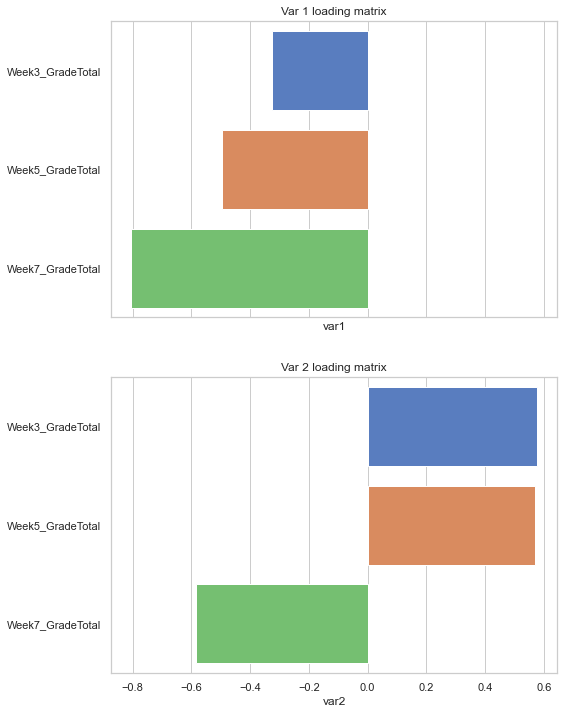

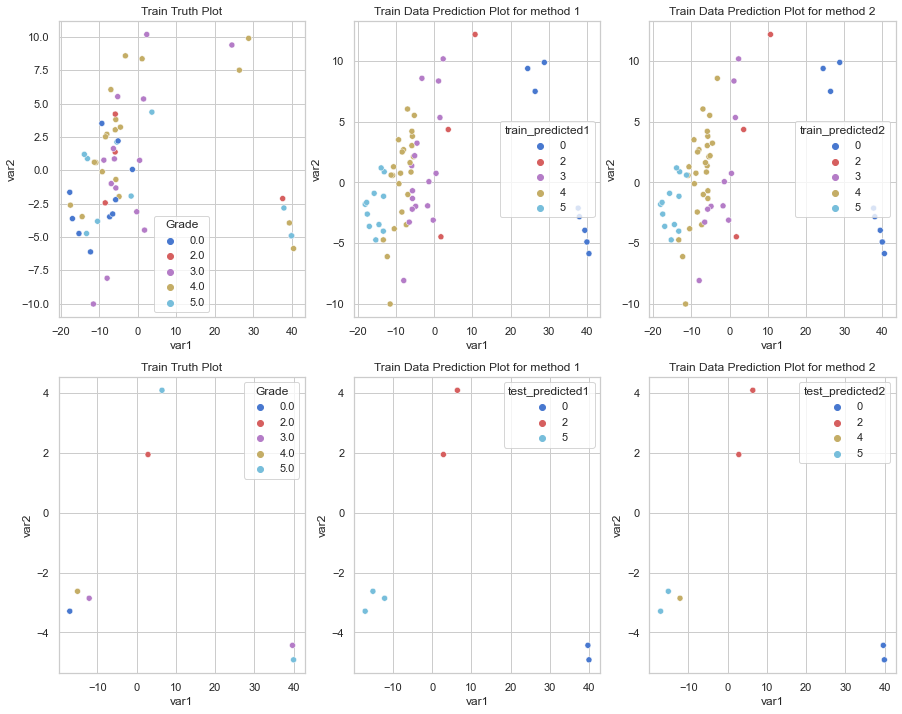

In [719]:
index = 2
selected_row = accuracies.iloc[index]
plot_result_with_pca(df2, selected_row['predictors'], label, accuracies, k_index=index)
# plot_cm_from_result_df(df2, accuracies)
# plot_feature_importance(accuracies, index, 'LessData_AllGrade_GradeTotalOnly', 'LessData_AllGrade_GradeTotalOnly')